<a href="https://colab.research.google.com/github/polaroidz/chinese_generation/blob/master/Experimental_Design_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
library(tidyverse)

data(ToothGrowth)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
glimpse(ToothGrowth)

Rows: 60
Columns: 3
$ len  <dbl> 4.2, 11.5, 7.3, 5.8, 6.4, 10.0, 11.2, 11.2, 5.2, 7.0, 16.5, 16.5,…
$ supp <fct> VC, VC, VC, VC, VC, VC, VC, VC, VC, VC, VC, VC, VC, VC, VC, VC, V…
$ dose <dbl> 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, …


In [4]:
# Perform a two-sided t-test
t.test(x = ToothGrowth$len, alternative = "two.sided", mu = 18)


	One Sample t-test

data:  ToothGrowth$len
t = 0.82361, df = 59, p-value = 0.4135
alternative hypothesis: true mean is not equal to 18
95 percent confidence interval:
 16.83731 20.78936
sample estimates:
mean of x 
 18.81333 


In [5]:
# Perform a t-test
ToothGrowth_ttest <- t.test(len ~ supp, data = ToothGrowth)

# Load broom
library(broom)

# Tidy ToothGrowth_ttest
tidy(ToothGrowth_ttest)

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
3.7,20.66333,16.96333,1.915268,0.06063451,55.30943,-0.1710156,7.571016,Welch Two Sample t-test,two.sided


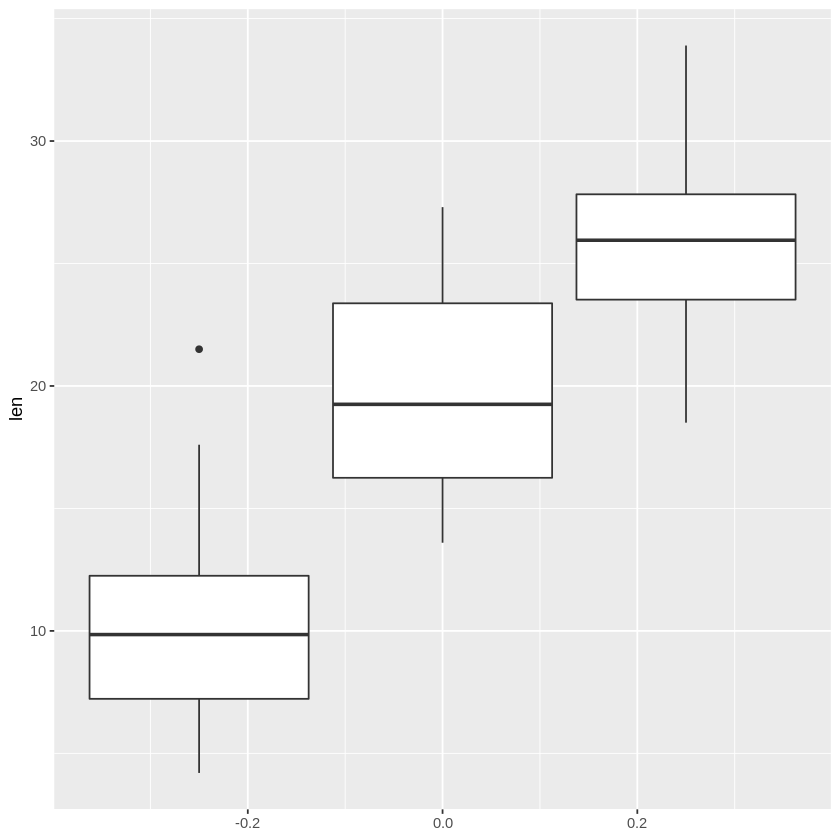

In [11]:
# Create a boxplot with geom_boxplot()
ggplot(ToothGrowth, aes(group = dose, y = len)) + 
    geom_boxplot() 

In [12]:
# Create ToothGrowth_aov
ToothGrowth_aov <- aov(len ~ dose + supp, data = ToothGrowth)

# Examine ToothGrowth_aov with summary()
summary(ToothGrowth_aov)


            Df Sum Sq Mean Sq F value   Pr(>F)    
dose         1 2224.3  2224.3  123.99 6.31e-16 ***
supp         1  205.4   205.4   11.45   0.0013 ** 
Residuals   57 1022.6    17.9                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1